<h1 style="text-align: left;">Computer Vision Assignment<br><br>Face Detection and Mask Classification<br>


# Dataset Info

### The dataset contains 2 folders - 'mask', 'nomask'

### And a total of 401 images of people wearing masks and others who are not.


## Import Libraries

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

In [2]:
import tensorflow as tf

# Making sure if the GPU is enabled for this session:

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [3]:
# Setting the seed:

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Recognizing and Understanding Data

In [4]:
my_data_dir = "C:\\Users\\Intes\\Desktop\\model\\model\\data"

In [5]:
os.listdir(my_data_dir)

['test', 'train']

In [6]:
test_path = os.path.join(my_data_dir, "test")
train_path = os.path.join(my_data_dir, "train")

In [7]:
os.listdir(test_path)

['mask', 'nomask']

In [8]:
os.listdir(train_path)

['mask', 'nomask']

In [9]:
classes = os.listdir(train_path)
classes

['mask', 'nomask']

In [10]:
import pathlib

data_dir = pathlib.Path(train_path)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# created a list of class_names from the subdirectories
print(class_names)

['mask' 'nomask']


In [11]:
class_names

array(['mask', 'nomask'], dtype='<U6')

**Let's check how many images there are.**

In [12]:
os.listdir(os.path.join(train_path, "mask"))[:5]

['mask158_face0.png',
 'mask160_face0.png',
 'mask166_face0.png',
 'mask170_face0.png',
 'mask175_face0.png']

In [13]:
len(os.listdir(os.path.join(train_path, "mask"))), len(
    os.listdir(os.path.join(train_path, "nomask"))
)

(109, 48)

In [14]:
len(os.listdir(os.path.join(test_path, "mask"))), len(
    os.listdir(os.path.join(test_path, "nomask"))
)

(36, 16)

In [15]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
    )

There are 2 directories and 0 images in 'C:\Users\Intes\Desktop\model\model\data'.
There are 2 directories and 0 images in 'C:\Users\Intes\Desktop\model\model\data\test'.
There are 0 directories and 36 images in 'C:\Users\Intes\Desktop\model\model\data\test\mask'.
There are 0 directories and 16 images in 'C:\Users\Intes\Desktop\model\model\data\test\nomask'.
There are 2 directories and 0 images in 'C:\Users\Intes\Desktop\model\model\data\train'.
There are 0 directories and 109 images in 'C:\Users\Intes\Desktop\model\model\data\train\mask'.
There are 0 directories and 48 images in 'C:\Users\Intes\Desktop\model\model\data\train\nomask'.


**Let's take an example images from both train-mask and train-nomask folders to observe process**

In [16]:
os.listdir(os.path.join(train_path, "mask"))[:10]

['mask158_face0.png',
 'mask160_face0.png',
 'mask166_face0.png',
 'mask170_face0.png',
 'mask175_face0.png',
 'mask181_face0.png',
 'mask183_face1.png',
 'mask184_face0.png',
 'mask188_face0.png',
 'mask189_face0.png']

In [17]:
len(os.listdir(os.path.join(train_path, "mask"))[:]) , len(os.listdir(os.path.join(train_path, "nomask"))[:]),len(os.listdir(os.path.join(test_path, "mask"))[:]),len(os.listdir(os.path.join(test_path, "nomask"))[:])

(109, 48, 36, 16)

In [18]:
os.listdir(os.path.join(train_path, "nomask"))[:5]

['mask105_face0.png',
 'mask105_face1.png',
 'mask111_face0.png',
 'mask114_face0.png',
 'mask115_face0.png']

In [19]:
mask_path = os.path.join(
    train_path, "mask", os.listdir(os.path.join(train_path, "mask"))[5]
)

In [20]:
mask_path

'C:\\Users\\Intes\\Desktop\\model\\model\\data\\train\\mask\\mask181_face0.png'

In [21]:
imread(mask_path)

array([[[0.95686275, 0.9137255 , 0.8901961 ],
        [0.95686275, 0.9137255 , 0.8901961 ],
        [0.95686275, 0.9137255 , 0.8901961 ],
        ...,
        [0.14117648, 0.11764706, 0.11372549],
        [0.13333334, 0.10980392, 0.10980392],
        [0.10980392, 0.09019608, 0.09019608]],

       [[0.9607843 , 0.91764706, 0.89411765],
        [0.9607843 , 0.91764706, 0.89411765],
        [0.9607843 , 0.91764706, 0.89411765],
        ...,
        [0.12941177, 0.10980392, 0.10588235],
        [0.13333334, 0.11372549, 0.11372549],
        [0.12156863, 0.09803922, 0.09803922]],

       [[0.9607843 , 0.91764706, 0.89411765],
        [0.9607843 , 0.91764706, 0.89411765],
        [0.9607843 , 0.91764706, 0.89411765],
        ...,
        [0.12156863, 0.10196079, 0.10196079],
        [0.1254902 , 0.09803922, 0.09803922],
        [0.1254902 , 0.10196079, 0.10196079]],

       ...,

       [[0.9019608 , 0.85882354, 0.88235295],
        [0.9019608 , 0.85882354, 0.88235295],
        [0.90588236, 0

In [22]:
mask = imread(mask_path)

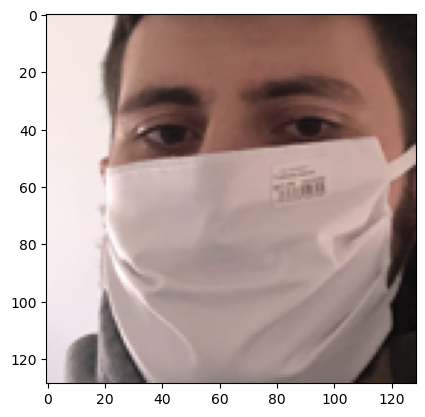

In [23]:
plt.imshow(mask);

In [24]:
mask.shape

(129, 129, 3)

In [25]:
os.listdir(os.path.join(train_path, "nomask"))[:10]

['mask105_face0.png',
 'mask105_face1.png',
 'mask111_face0.png',
 'mask114_face0.png',
 'mask115_face0.png',
 'mask117_face1.png',
 'mask122_face0.png',
 'mask122_face1.png',
 'mask122_face2.png',
 'mask126_face0.png']

In [118]:
nomask_path = os.path.join(
    train_path, "nomask/", os.listdir(os.path.join(train_path, "nomask"))[2]
)

In [119]:
imread(nomask_path)

array([[[0.25490198, 0.19607843, 0.18039216],
        [0.26666668, 0.20784314, 0.19215687],
        [0.34117648, 0.2901961 , 0.28627452],
        ...,
        [0.27450982, 0.2509804 , 0.27058825],
        [0.29803923, 0.2784314 , 0.3137255 ],
        [0.28235295, 0.27450982, 0.30588236]],

       [[0.21960784, 0.1882353 , 0.15294118],
        [0.23137255, 0.1882353 , 0.18039216],
        [0.3372549 , 0.2901961 , 0.28235295],
        ...,
        [0.28627452, 0.2784314 , 0.26666668],
        [0.29803923, 0.2901961 , 0.28627452],
        [0.2901961 , 0.27058825, 0.2627451 ]],

       [[0.21568628, 0.18431373, 0.16078432],
        [0.20784314, 0.16862746, 0.16078432],
        [0.3372549 , 0.2901961 , 0.2901961 ],
        ...,
        [0.29803923, 0.29803923, 0.28627452],
        [0.31764707, 0.3137255 , 0.3137255 ],
        [0.3019608 , 0.28235295, 0.2784314 ]],

       ...,

       [[0.2627451 , 0.2627451 , 0.27450982],
        [0.25882354, 0.26666668, 0.26666668],
        [0.24705882, 0

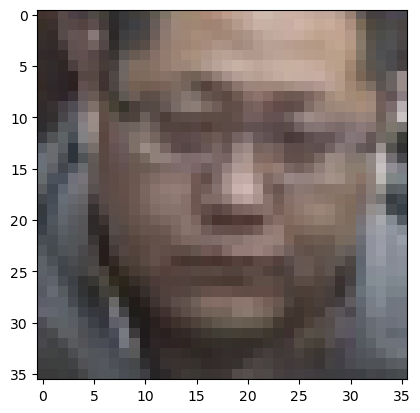

In [120]:
nomask = imread(nomask_path)
plt.imshow(nomask);

In [29]:
nomask.shape

(36, 36, 3)

In [30]:
# View a random image
import random


def view_random_image(target_dir, target_class):
    """Returns a randomly selected image after displaying it,
    given directory path and class names.
    Args:
        target_dir (str): Relative path to the target directory
        target_class (str): The name of the target class to randomly select a picture from
    Returns:
        img (np.ndarray): Randomly selected image as np.ndarray
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (43, 43, 3)


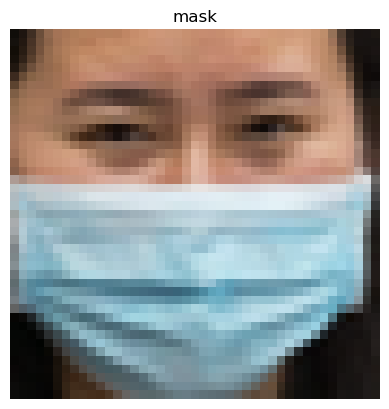

In [31]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="mask")

Image shape: (43, 43, 3)


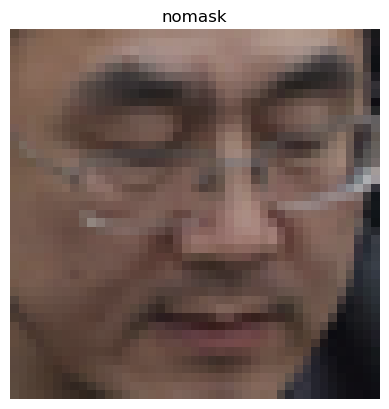

In [32]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="nomask")

Image shape: (44, 43, 3)


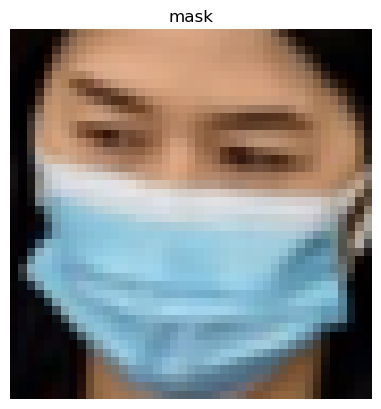

In [33]:
# View a random image from the training dataset
import random

img = view_random_image(
    target_dir=train_path, target_class=random.choice(class_names)
)  # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [34]:
nomask.shape

(36, 36, 3)

In [35]:
mask.shape

(129, 129, 3)

In [36]:
x = [
    imread(os.path.join(train_path, "mask", image)).shape[0]
    for image in os.listdir(os.path.join(train_path, "mask"))
    if "Thumbs.db" not in image
]
y = [
    imread(os.path.join(train_path, "mask", image)).shape[1]
    for image in os.listdir(os.path.join(train_path, "mask"))
    if "Thumbs.db" not in image
]

In [37]:
x[:5]

[36, 74, 90, 108, 63]

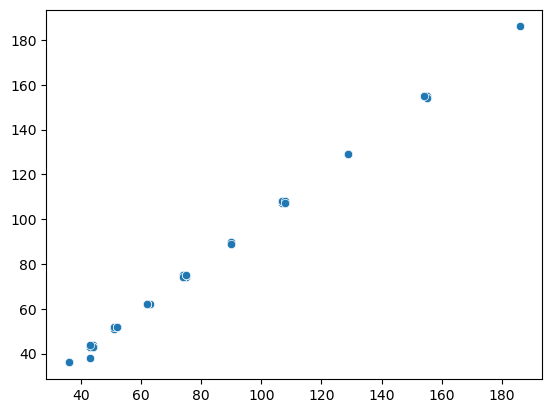

In [38]:
sns.scatterplot(x=x, y=y);

In [39]:
np.mean(x), np.median(x)

(73.45871559633028, 62.0)

In [40]:
np.mean(y), np.median(y)

(73.41284403669725, 62.0)

In [41]:
image_shape = (130, 130, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [42]:
nomask.max()

1.0

In [43]:
mask.max()

1.0

As we see above, all images have already been scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [46]:
image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [47]:
val_image_gen = ImageDataGenerator()

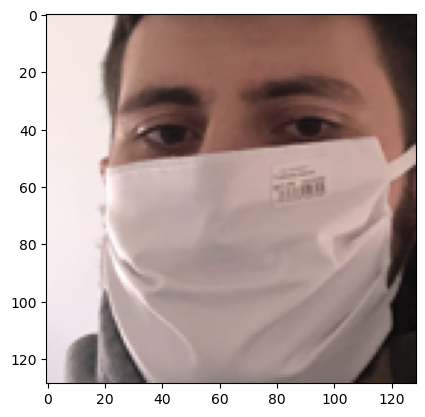

In [48]:
plt.imshow(mask);

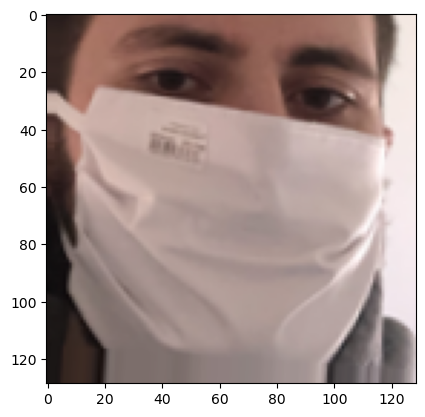

In [49]:
plt.imshow(image_gen.random_transform(mask));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [50]:
# Takes the path to a directory & generates batches of augmented data.

In [51]:
image_gen.flow_from_directory(train_path)

Found 157 images belonging to 2 classes.


In [52]:
val_image_gen.flow_from_directory(test_path)

Found 52 images belonging to 2 classes.


In [53]:
batch_size = 32

In [54]:
image_shape

(130, 130, 3)

In [55]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
)

Found 157 images belonging to 2 classes.


In [56]:
test_image_gen = val_image_gen.flow_from_directory(
    directory=test_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

Found 52 images belonging to 2 classes.


In [57]:
train_image_gen.class_indices

{'mask': 0, 'nomask': 1}

In [58]:
test_image_gen.class_indices

{'mask': 0, 'nomask': 1}

In [59]:
train_image_gen

In [60]:
train_image_gen[0][0].shape

(32, 130, 130, 3)

In [61]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [62]:
len(train_image_gen), len(test_image_gen)

(5, 2)

In [63]:
len(train_image_gen) * batch_size, len(test_image_gen) * batch_size

(160, 64)

In [64]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [65]:
# Get a sample of the testing data batch
images, labels = test_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
model1 = Sequential()
# CNN for the feature extraction
model1.add(
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())
#### - - - - - - -- - - - - - 
# ANN for the classification
model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dropout(0.5))

model1.add(Dense(1))
# here we used Sigmoid because it is a binary classificaiton, if we had multiple classes it would be Softmax
model1.add(Activation("sigmoid"))

# We use the binary cross entropy for the loss because it is a binary classification
# The metric we are depending on for the sake of this first experiment is accuracy
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [69]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [70]:
model1.fit(
    train_image_gen,
    epochs=10,
    steps_per_epoch=len(train_image_gen),
    validation_data=test_image_gen,
    validation_steps=len(test_image_gen),
    callbacks=[early_stop],
)

Epoch 1/10
5/5 [==============================] - 5s 288ms/step - loss: 89.8572 - accuracy: 0.5096 - val_loss: 1.4492 - val_accuracy: 0.3462
Epoch 2/10
5/5 [==============================] - 1s 116ms/step - loss: 2.8837 - accuracy: 0.6306 - val_loss: 0.6610 - val_accuracy: 0.6346
Epoch 3/10
5/5 [==============================] - 1s 118ms/step - loss: 1.1329 - accuracy: 0.6943 - val_loss: 0.3992 - val_accuracy: 0.8654
Epoch 4/10
5/5 [==============================] - 1s 120ms/step - loss: 0.5054 - accuracy: 0.7197 - val_loss: 0.2467 - val_accuracy: 0.8846
Epoch 5/10
5/5 [==============================] - 1s 118ms/step - loss: 0.4590 - accuracy: 0.8025 - val_loss: 0.3123 - val_accuracy: 0.7885
Epoch 6/10
5/5 [==============================] - 1s 127ms/step - loss: 0.4743 - accuracy: 0.7707 - val_loss: 0.2620 - val_accuracy: 0.9808


In [71]:
model1.metrics_names

['loss', 'accuracy']

In [72]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,89.857231,0.509554,1.449187,0.346154
1,2.883709,0.630573,0.661018,0.634615
2,1.132876,0.694268,0.399191,0.865385
3,0.505394,0.719745,0.246692,0.884615
4,0.458978,0.802548,0.312265,0.788462


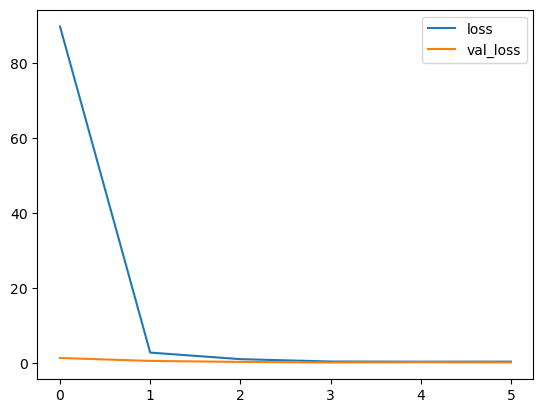

In [73]:
summary[["loss", "val_loss"]].plot();

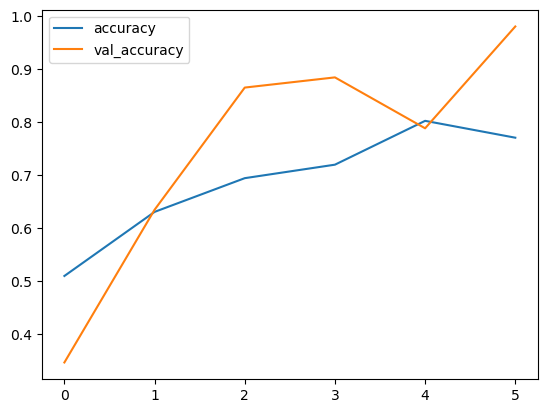

In [74]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
score = model1.evaluate(test_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 15ms/step - loss: 0.2467 - accuracy: 0.8846
Test loss: 0.24669215083122253
Test accuracy: 0.8846153616905212


In [77]:
pred_prob = model1.predict(test_image_gen)

In [78]:
pred_prob

array([[2.4682598e-02],
       [4.1057818e-02],
       [2.4129238e-02],
       [5.1333536e-03],
       [7.3706210e-03],
       [2.9365184e-02],
       [7.4196331e-02],
       [1.4488450e-01],
       [1.0389025e-02],
       [1.0404174e-02],
       [1.8584201e-01],
       [1.2612894e-02],
       [2.6812240e-01],
       [1.8124892e-01],
       [2.6473968e-04],
       [2.2661433e-01],
       [3.2423191e-02],
       [4.1210361e-02],
       [4.6417162e-02],
       [1.2719618e-01],
       [2.4917634e-02],
       [6.0256008e-02],
       [2.7122867e-01],
       [2.1515520e-01],
       [8.3612934e-02],
       [7.7528842e-03],
       [3.8027866e-03],
       [8.2844950e-02],
       [1.3410692e-03],
       [1.8718646e-01],
       [3.8223922e-02],
       [2.4171829e-02],
       [3.1417636e-03],
       [1.8969290e-01],
       [1.7079440e-01],
       [2.1375818e-02],
       [5.4887921e-01],
       [4.9101487e-01],
       [4.3950930e-01],
       [5.8612686e-01],
       [2.3690620e-01],
       [4.969779

In [79]:
y_pred = pred_prob > 0.5

In [80]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True]])

In [81]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.62      0.77        16

    accuracy                           0.88        52
   macro avg       0.93      0.81      0.85        52
weighted avg       0.90      0.88      0.88        52



In [83]:
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [ 6, 10]], dtype=int64)

# Modelling-2

In [84]:
model2 = Sequential()

model2.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        input_shape=image_shape,
        padding="same",
        activation="relu",
    )
)
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 130, 130, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 65, 65, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 65, 65, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 65, 65, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)      

In [86]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [87]:
model2.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=test_image_gen,
    validation_steps=len(test_image_gen),
    callbacks=[early_stop],
)

Epoch 1/15
5/5 [==============================] - 7s 988ms/step - loss: 6.1616 - accuracy: 0.5669 - val_loss: 0.6275 - val_accuracy: 0.6731
Epoch 2/15
5/5 [==============================] - 1s 156ms/step - loss: 0.6767 - accuracy: 0.6306 - val_loss: 0.5724 - val_accuracy: 0.6923
Epoch 3/15
5/5 [==============================] - 1s 144ms/step - loss: 0.5398 - accuracy: 0.7325 - val_loss: 0.5334 - val_accuracy: 0.6923
Epoch 4/15
5/5 [==============================] - 1s 126ms/step - loss: 0.4489 - accuracy: 0.7197 - val_loss: 0.4729 - val_accuracy: 0.8269
Epoch 5/15
5/5 [==============================] - 1s 127ms/step - loss: 0.4939 - accuracy: 0.7962 - val_loss: 0.4755 - val_accuracy: 0.8462
Epoch 6/15
5/5 [==============================] - 1s 127ms/step - loss: 0.3865 - accuracy: 0.8344 - val_loss: 0.2237 - val_accuracy: 0.9423
Epoch 7/15
5/5 [==============================] - 1s 128ms/step - loss: 0.5440 - accuracy: 0.6815 - val_loss: 0.4522 - val_accuracy: 0.8654
Epoch 8/15
5/5 [====

In [88]:
model2.metrics_names

['loss', 'accuracy']

In [89]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,6.161570,0.566879,0.627471,0.673077
1,0.676670,0.630573,0.572426,0.692308
2,0.539798,0.732484,0.533390,0.692308
3,0.448862,0.719745,0.472866,0.826923
4,0.493898,0.796178,0.475533,0.846154


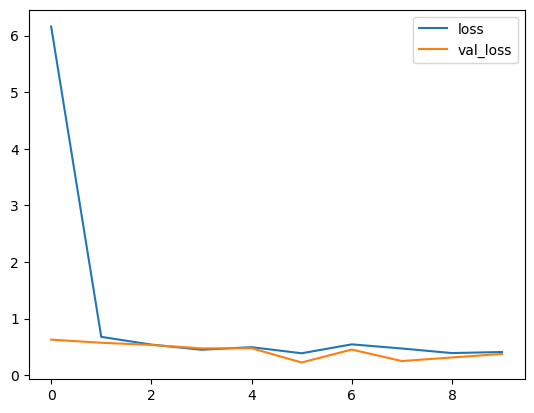

In [90]:
summary[["loss", "val_loss"]].plot()
plt.show()

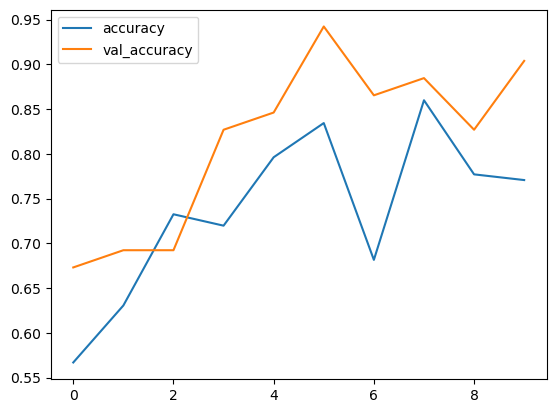

In [91]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [92]:
score = model2.evaluate(test_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 21ms/step - loss: 0.2237 - accuracy: 0.9423
Test loss: 0.22369013726711273
Test accuracy: 0.942307710647583


In [93]:
pred_prob = model2.predict(test_image_gen)

In [94]:
y_pred = pred_prob > 0.5

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.88      0.94      0.91        16

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.93        52
weighted avg       0.94      0.94      0.94        52



In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.88      0.94      0.91        16

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.93        52
weighted avg       0.94      0.94      0.94        52



In [97]:
confusion_matrix(y_test, y_pred)

array([[34,  2],
       [ 1, 15]], dtype=int64)

In [98]:
model1.save("mask_model.h5")

# Prediction

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [100]:
model = load_model("mask_model.h5")

In [101]:
target_class = random.choice(class_names)
target_class

'mask'

In [102]:
random_image = random.sample(os.listdir(os.path.join(test_path, target_class)), 1)
random_image

['mask136_face0.png']

In [103]:
image_path = os.path.join(test_path, target_class, random_image[0])
image_path

'C:\\Users\\Intes\\Desktop\\model\\model\\data\\test\\mask\\mask136_face0.png'

In [104]:
my_image = image.load_img(image_path, target_size=image_shape)

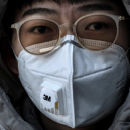

In [105]:
my_image

In [106]:
type(my_image)

PIL.Image.Image

In [107]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [108]:
my_image.shape

(130, 130, 3)

In [109]:
my_image = np.expand_dims(my_image, axis=0)

In [110]:
my_image.shape

(1, 130, 130, 3)

In [111]:
model.predict(my_image)

array([[0.01261288]], dtype=float32)

In [112]:
train_image_gen.class_indices

{'mask': 0, 'nomask': 1}

In [113]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = random.choice(class_names)
    random_image = random.sample(os.listdir(os.path.join(test_path, target_class)), 1)
    img_path = os.path.join(test_path, target_class, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

prediction_probability:  0.07419652


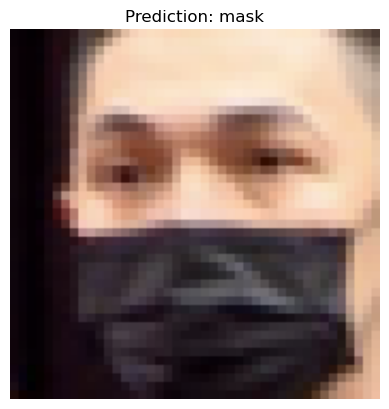

In [114]:
pred_and_plot(model, (130, 130))